In [68]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.colors import LogNorm
import matplotlib.cm as cm
from astropy.io import fits
from scipy.optimize import curve_fit

matplotlib.rcParams.update({'font.size':18})
matplotlib.rcParams.update({'font.family':'serif'})

In [66]:
# read the SNe data in
file = 'data/J_ApJ_716_712_tableb2.dat'


df = pd.read_table(file, delimiter='|', skiprows=7, header=None,
                   names=['SNe', 'S2N', 'Z', 'Bmag', 'Bmag_e', 'x1', 'x1_e', 'c', 'c_e', 'mu', 'mu_e', 'ref', 'fail'])
# df

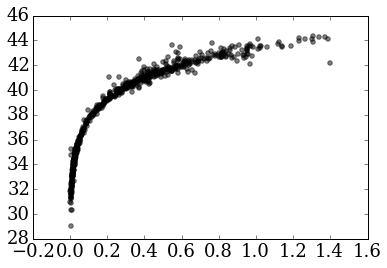

In [76]:
plt.scatter(df['Z'], df['mu'], c='k', alpha=0.5)

# Polynomial Fits

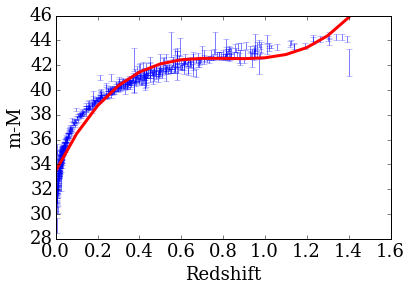

In [65]:
ok = np.isfinite(df['mu'])
fit = np.polyfit(df['Z'][ok], df['mu'][ok], 3)

plt.errorbar(df['Z'],(df['mu']), yerr=df['mu_e'], alpha=0.5, fmt=None)
plt.plot(np.arange(0,1.5,0.1), np.polyval(fit, np.arange(0,1.5,0.1)), color='red', lw=3)
plt.xlabel('Redshift')
plt.ylabel('m-M')

# Powerlaw Fit

We're going to cheat a bit and fit the $\log_{10}(Z)$ space with a line


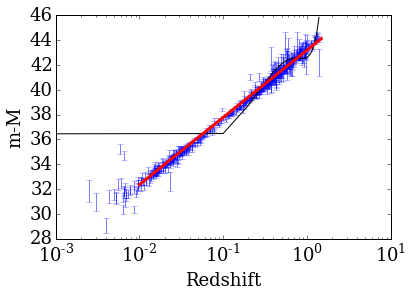

In [75]:
fit2 = np.polyfit(np.log10(df['Z'][ok]), df['mu'][ok], 1)
plt.errorbar(df['Z'],(df['mu']), yerr=df['mu_e'], alpha=0.5, fmt=None)
plt.plot(np.arange(0,1.5,0.1), np.polyval(fit, np.arange(0,1.5,0.1)), color='k', lw=1)
plt.plot(np.arange(0.01,1.5,0.01), np.polyval(fit2, np.log10(np.arange(0.01,1.5,0.01))), color='red', lw=3)
plt.xlabel('Redshift')
plt.ylabel('m-M')
plt.xscale('log')

# Compare Fits

- Calculate the $\chi^2$ for the fits
    - BIC = $\chi^2 + k$ $ln(n)$, where $k$ is the # of degrees of freedom in the model, $n$ the # of data points
    - https://en.wikipedia.org/wiki/Bayesian_information_criterion
- $\chi^2 = 1/n$ $\Sigma$ ((data - model) / errors)$^2$
- Compare with the BIC
- Which model is the "best"?

# Fit a Gaussian

In [77]:
def gaus(x, a, b, x0, sigma):
    """
    Simple Gaussian function

    Parameters
    ----------
    x : float or 1-d numpy array
        The data to evaluate the Gaussian over
    a : float
        the amplitude
    b : float
        the constant offset
    x0 : float
        the center of the Gaussian
    sigma : float
        the width of the Gaussian

    Returns
    -------
    Array or float of same type as input (x).
    """
    return a * np.exp(-(x - x0)**2 / (2 * sigma**2)) + b


In [91]:
# read the data in...
dfile = 'data/spec-3819-55540-0186.fits'

hdulist = fits.open(dfile)
tbl = hdulist[1].data
hdr = hdulist[0].header
# tbl.columns
flux = tbl['flux']

In [90]:
hdr

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T                                                  
TELESCOP= 'SDSS 2.5-M'         / Sloan Digital Sky Survey                       
FLAVOR  = 'science '           / exposure type, SDSS spectro style              
BOSSVER = 'r       '           / ICC version                                    
MJD     =                55540 / APO fMJD day at start of exposure              
MJDLIST = '55540   '           /                                                
NAME    = '3819-55540-01'      / The name of the currently loaded plate         
PLATEID =                 3819 / The currently loaded plate                     
TILEID  =                10182 /Cartridge used in this plugging                 
CARTID  =                   

In [92]:
wave = 10. ** (np.arange(0,len(flux)) * hdr['COEFF1'] + hdr['COEFF0'])

(5000, 6000)

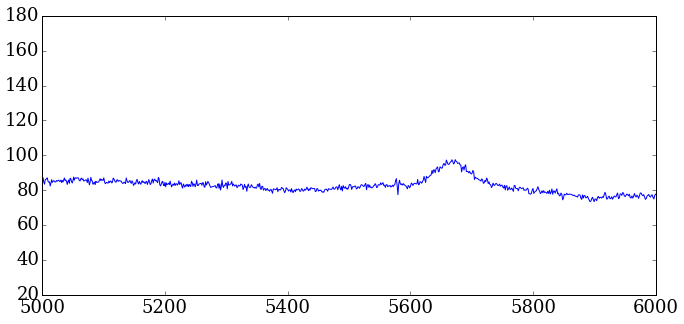

In [96]:
plt.figure(figsize=(11,5))
plt.plot(wave, flux)
plt.xlim(5000,6000)

(5000, 6000)

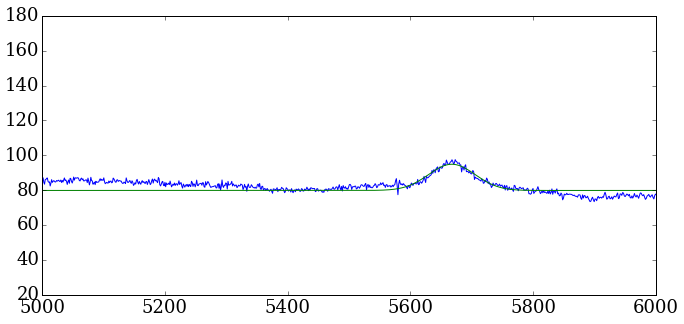

In [102]:
p0 = (20, 80, 5610, 2)

x = np.where((wave > 5500) & (wave < 5900))
fit, cov = curve_fit(gaus, wave[x], flux[x], p0=p0)

plt.figure(figsize=(11,5))
plt.plot(wave, flux)
plt.plot(wave, gaus(wave, *fit))
plt.xlim(5000,6000)

# Compute the Redshift

Recall: 

$1 + z = \lambda_{obs} / \lambda_{rest}$